2018-12-11 01:12:00
重齿巡检时发现齿轮箱高速轴磨损，现配合重齿人员已将高速轴拆出，待明日风小后进行高速轴安装工作

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "11"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (3289, 75)
speed.shape: (3289, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

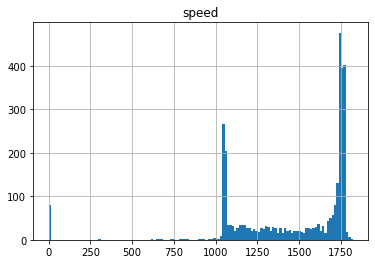

In [5]:
speed.hist(bins=128)

feature.shape: (3208, 75)
speed.shape: (3208, 1)


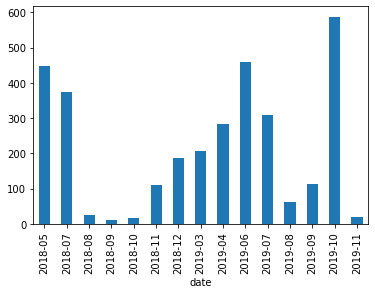

In [6]:
speed_threshold = 250
feature = feature[speed.speed >= speed_threshold]
speed = speed[speed.speed >= speed_threshold]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [21]:
# 划分train set, test set
# train_start = "2019"
# train_end = "2019"

test_start = "2018-05"
test_end = "2018"

# feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
speed_test = speed[test_start: test_end]

feature_train = feature.drop(index=feature_test.index)
speed_train = speed.drop(index=speed_test.index)

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (2037, 75)
speed_train.shape: (2037, 1)
feature_test.shape: (1171, 75)
speed_test.shape: (1171, 1)


In [22]:
feature_test = feature
speed_test = speed

In [23]:
detector = model_entry.OutlierDetector()

In [24]:
detector.fit(feature_train)

<AxesSubplot:xlabel='date'>

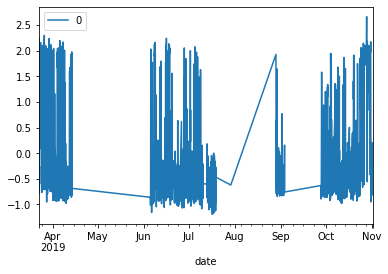

In [25]:
detector.decision_scores.plot()

In [26]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

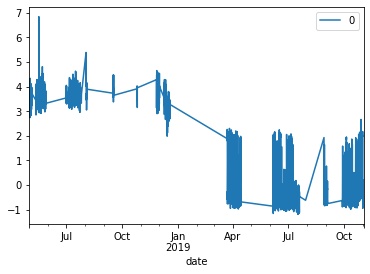

In [27]:
anomaly_scores.plot()

In [28]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-05-02 15:00,4.120249
2018-05-03 00:00,4.333024
2018-05-03 07:00,4.085938
2018-05-04 03:00,4.122371
2018-05-04 20:00,4.057677
...,...
2018-12-09 15:00,4.033978
2018-12-09 17:00,4.180872
2018-12-09 21:00,4.076386
